In [2]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns

file = pd.read_csv('advertising.csv')
file.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
file.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
file.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


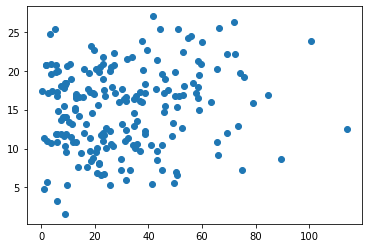

In [47]:
X=file['Newspaper'].values
Y=file['Sales'].values


mp.scatter(X,Y)
mp.show()

In [48]:
#Calculating Mean of x and Y

meanofx = np.mean(X)

meanofy = np.mean(Y)

totalnumberofvalues =  len(X)

print(meanofx,meanofy,totalnumberofvalues)

30.553999999999995 15.130500000000001 200


In [49]:
#Solving Y=MX+C
#finding m=Summation(x-x`)(y-y`)/Summation(x-x`)^2
#x' & y` are mean of X and Y

upperval=0
lowerval=0

for i in range(totalnumberofvalues):
    upperval += (X[i]-meanofx)*(Y[i]-meanofy)
    lowerval += (X[i]-meanofx)**2
print (upperval,lowerval)

3617.300599999999 94387.35680000005


In [50]:
#Calculate M i.e, upperval/lowerval

coeffofx = upperval/lowerval

print (coeffofx)

0.03832399510524271


In [51]:
#Finding value of C i.e, Constant in the Equation Y=MX+C
#Y-MX=C

constant = meanofy - (coeffofx * meanofx)
print(constant)

13.959548653554416


In [52]:
#We got M and C , Ypredictvalues = M*X+C
""""
Ypredict=[]

for i in range(totalnumberofvalues):
    predict = (coeffofx * X[i]) + constant
    Ypredict.append(predict)
    """

actualdistance=0
predist=0

for i in range(totalnumberofvalues):
    ypredict = (coeffofx * X[i]) + constant
    predist += (ypredict-meanofy)**2
    actualdistance +=(Y[i]-meanofy)**2
rsquare = predist/actualdistance
print(rsquare)

0.02495136986286498


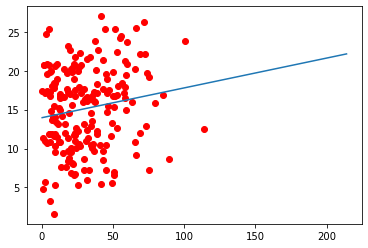

In [53]:
x_min = np.min(X)
x_max = np.max(X)+100

x= np.linspace(x_min,x_max,1000)
y= (coeffofx * x) + constant
mp.scatter(X,Y,edgecolors='red',c='red')

mp.plot(x,y,scalex=100,scaley=200)


<AxesSubplot:xlabel='TV', ylabel='Sales'>

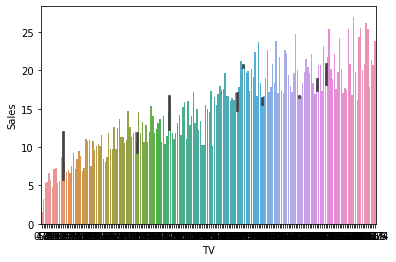

In [42]:
sns.barplot(x='TV',y='Sales',data=file)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

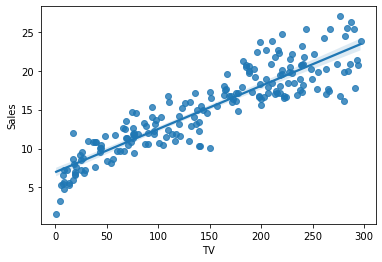

In [15]:
sns.regplot(x="TV",y="Sales",data=file)

C:\Users\GDKumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

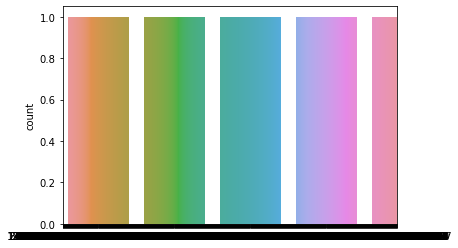

In [22]:
sns.countplot(x,data=file)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

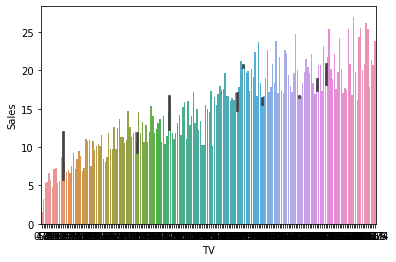

In [23]:



sns.barplot(x="TV",y="Sales",data = file)

In [54]:
my_predictions_NP = pd.DataFrame({'Newspaper':x,'Sales':y})

In [55]:
my_predictions_NP.to_csv('predictionnp.csv',index=False,header=True)

In [27]:
predictdata = pd.read_csv('prediction.csv')

In [28]:
predictdata.head()

,TV,Sales
0,0.700000,7.013647
1,1.096096,7.035616
2,1.492192,7.057586
3,1.888288,7.079555
4,2.284384,7.101524


<AxesSubplot:xlabel='TV', ylabel='Sales'>

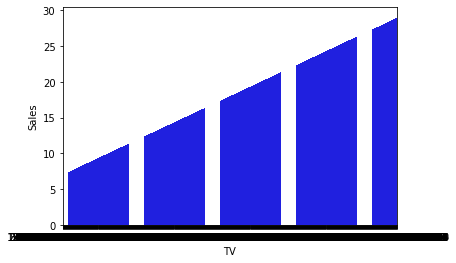

In [31]:
sns.barplot(x='TV',y='Sales',data = predictdata,color='blue')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

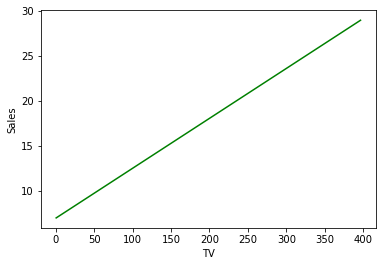

In [32]:
sns.lineplot(x='TV',y='Sales', data=predictdata,color='green')

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

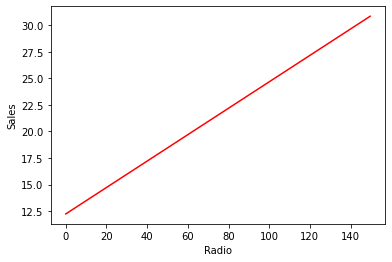

In [46]:
predictRadio = pd.read_csv('predictionRadio.csv')
sns.lineplot(x='Radio',y='Sales',data=predictRadio,color='red')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

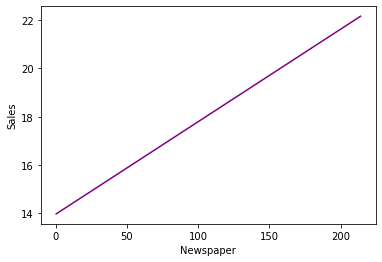

In [58]:
predictNP = pd.read_csv('predictionnp.csv')
sns.lineplot(x='Newspaper',y='Sales',data=predictNP,color='purple')

In [59]:
predictNP.corr()

,Newspaper,Sales
Newspaper,1.0,1.0
Sales,1.0,1.0
